In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings


In [2]:
#pip install seaborn

In [3]:

# --- Setup ---
# Ignore warnings for cleaner output and set plot styles for better aesthetics
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-talk')
print("Libraries imported and setup complete.")

# --- 1. Data Loading & Understanding ---
print("\n--- 1. Data Loading & Understanding ---")
try:
    # Load the dataset from the provided CSV file
    df = pd.read_csv('telco_churn_with_all_feedback.csv')
    print("Dataset 'telco_churn_with_all_feedback.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: 'telco_churn_with_all_feedback.csv' not found. Please ensure the file is in the correct directory.")
    exit() # Exit the script if the data file cannot be found


Libraries imported and setup complete.

--- 1. Data Loading & Understanding ---
Dataset 'telco_churn_with_all_feedback.csv' loaded successfully.


In [4]:

print(f"\nDataset Shape: {df.shape}")



Dataset Shape: (7043, 23)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PromptInput,CustomerFeedback
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,2,4,NaN,6539,2,6835,7043
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,NaN,,No,Write a realistic customer feedback based on t...,I have been using the DSL internet service fro...
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,2810,2785,3875,4171,2365,NaN,11,5174,6,1
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,NaN,NaN


In [7]:

# --- 2. Data Cleaning & Transformation ---
print("\n\n--- 2. Data Cleaning & Transformation ---")

# Drop columns that are not needed for the model
df.drop(['customerID', 'PromptInput'], axis=1, inplace=True)
print("- Dropped 'customerID' and 'PromptInput' columns.")




--- 2. Data Cleaning & Transformation ---
- Dropped 'customerID' and 'PromptInput' columns.


In [8]:

# Check for and report any duplicate rows
if df.duplicated().sum() > 0:
    print(f"- Found and removed {df.duplicated().sum()} duplicate rows.")
    df.drop_duplicates(inplace=True)
else:
    print("- No duplicate rows found. ✓")


- No duplicate rows found. ✓


In [9]:

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle nulls in 'TotalCharges' by imputing with the median
if df['TotalCharges'].isnull().sum() > 0:
    median_total_charges = df['TotalCharges'].median()
    df['TotalCharges'].fillna(median_total_charges, inplace=True)
    print(f"- Imputed missing 'TotalCharges' with the median value: {median_total_charges:.2f}")


- Imputed missing 'TotalCharges' with the median value: 1397.47


In [10]:

# Fill potential nulls in 'CustomerFeedback' with an empty string
df['CustomerFeedback'].fillna('', inplace=True)
print("- Ensured all 'CustomerFeedback' entries are strings.")


- Ensured all 'CustomerFeedback' entries are strings.


In [11]:

# Convert 'SeniorCitizen' from 0/1 to 'No'/'Yes' for better interpretability
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
print("- Transformed 'SeniorCitizen' from numeric to categorical.")
print("\nData cleaning and transformation complete. ✓")


- Transformed 'SeniorCitizen' from numeric to categorical.

Data cleaning and transformation complete. ✓




--- 3. Exploratory Data Analysis (EDA) & Visualization ---

--- 3.1 Univariate Analysis ---
Generating Plot 1: Churn Distribution...


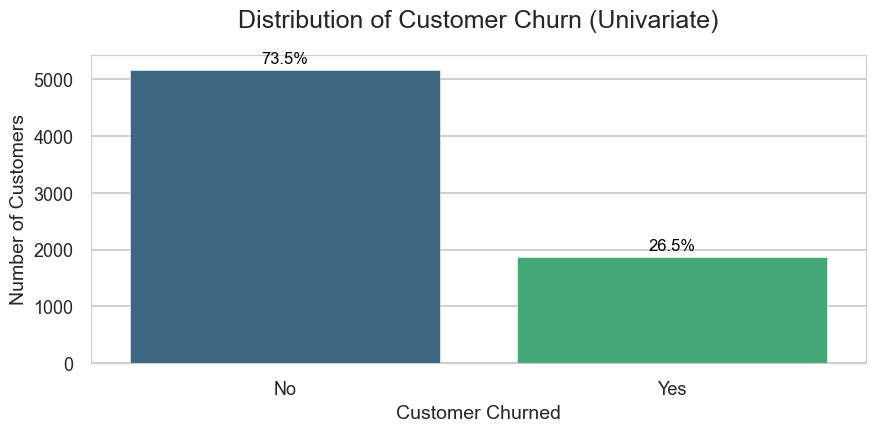

In [12]:

# --- 3. Exploratory Data Analysis (EDA) & Visualization ---
print("\n\n--- 3. Exploratory Data Analysis (EDA) & Visualization ---")

# --- Univariate Analysis ---
print("\n--- 3.1 Univariate Analysis ---")
print("Generating Plot 1: Churn Distribution...")
plt.figure(figsize=(10, 4))
ax = sns.countplot(x='Churn', data=df, palette='viridis', order=['No', 'Yes'])
plt.title('Distribution of Customer Churn (Univariate)', fontsize=18, pad=20)
plt.xlabel('Customer Churned', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(df):.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=12, color='black', xytext=(0, 8), textcoords='offset points')
plt.show()



--- 3.2 Bivariate Analysis ---
Generating Plot 2: Churn by Contract Type...


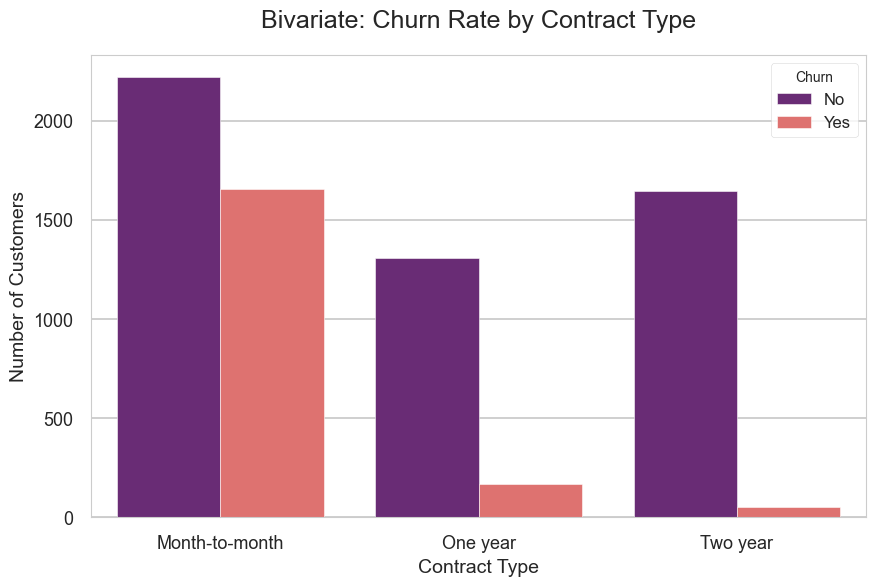

In [13]:

# --- Bivariate Analysis ---
print("\n--- 3.2 Bivariate Analysis ---")

# Categorical vs. Target
print("Generating Plot 2: Churn by Contract Type...")
plt.figure(figsize=(10,6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='magma', order=['Month-to-month', 'One year', 'Two year'])
plt.title('Bivariate: Churn Rate by Contract Type', fontsize=18, pad=20)
plt.xlabel('Contract Type', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend(title='Churn', fontsize=12)
plt.show()


Generating Plot 3: Churn by Internet Service...


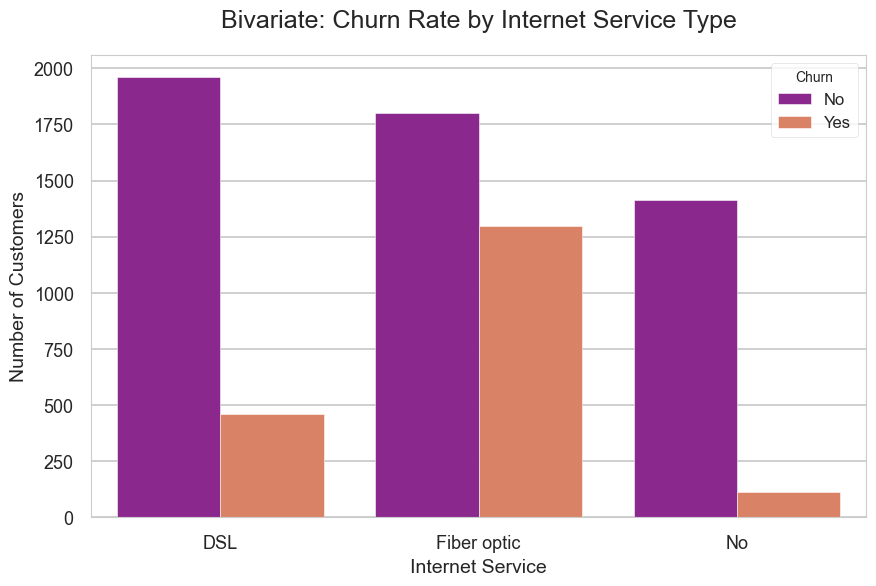

In [14]:

print("Generating Plot 3: Churn by Internet Service...")
plt.figure(figsize=(10,6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='plasma')
plt.title('Bivariate: Churn Rate by Internet Service Type', fontsize=18, pad=20)
plt.xlabel('Internet Service', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend(title='Churn', fontsize=12)
plt.show()


Generating Plot 4: Monthly Charges vs. Churn...


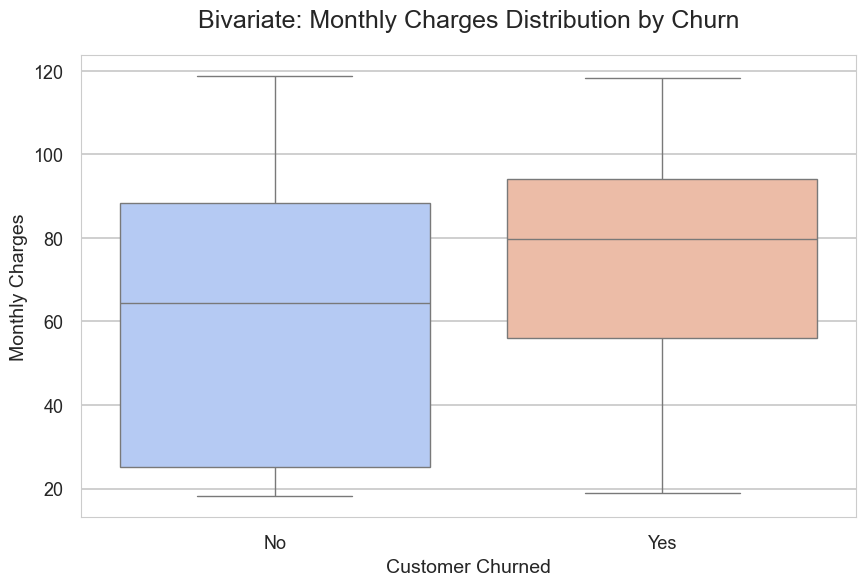

In [15]:

# Numerical vs. Target
print("Generating Plot 4: Monthly Charges vs. Churn...")
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')
plt.title('Bivariate: Monthly Charges Distribution by Churn', fontsize=18, pad=20)
plt.xlabel('Customer Churned', fontsize=14)
plt.ylabel('Monthly Charges', fontsize=14)
plt.show()


Generating Plot 5: Tenure vs. Churn...


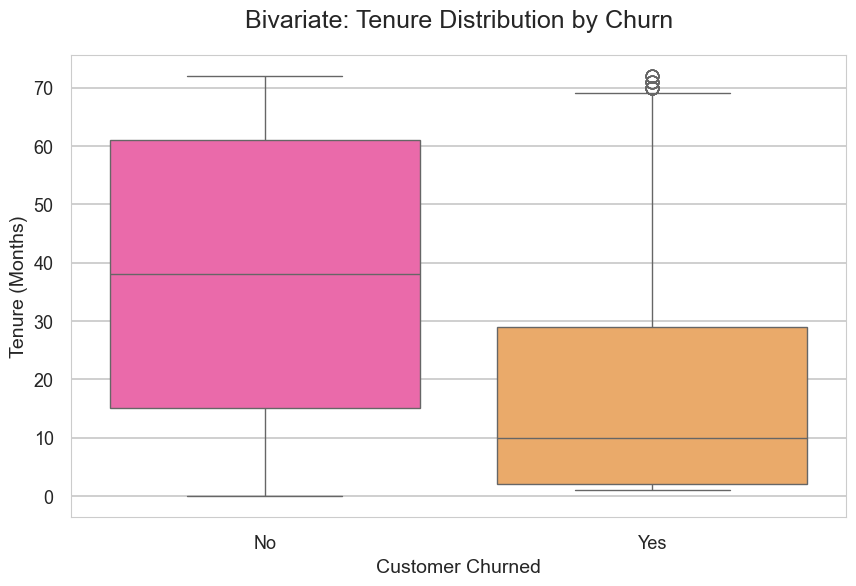

In [16]:

print("Generating Plot 5: Tenure vs. Churn...")
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='spring')
plt.title('Bivariate: Tenure Distribution by Churn', fontsize=18, pad=20)
plt.xlabel('Customer Churned', fontsize=14)
plt.ylabel('Tenure (Months)', fontsize=14)
plt.show()



--- 3.3 Multivariate Analysis ---
Generating Plot 6: Tenure vs. Monthly Charges by Churn...


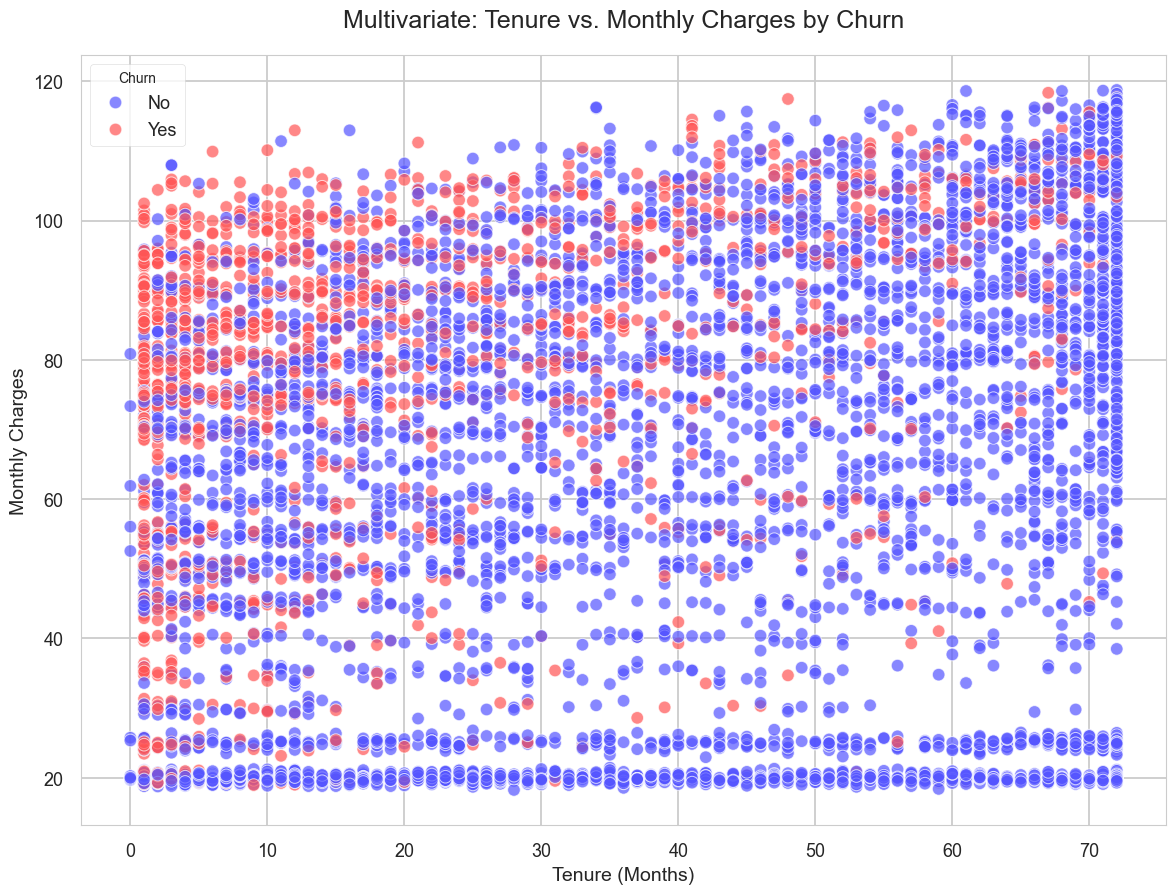

In [17]:

# --- Multivariate Analysis ---
print("\n--- 3.3 Multivariate Analysis ---")

print("Generating Plot 6: Tenure vs. Monthly Charges by Churn...")
plt.figure(figsize=(14, 10))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, palette='seismic', alpha=0.7)
plt.title('Multivariate: Tenure vs. Monthly Charges by Churn', fontsize=18, pad=20)
plt.xlabel('Tenure (Months)', fontsize=14)
plt.ylabel('Monthly Charges', fontsize=14)
plt.legend(title='Churn')
plt.show()


Generating Plot 7: Pairplot of Key Numerical Features by Churn...


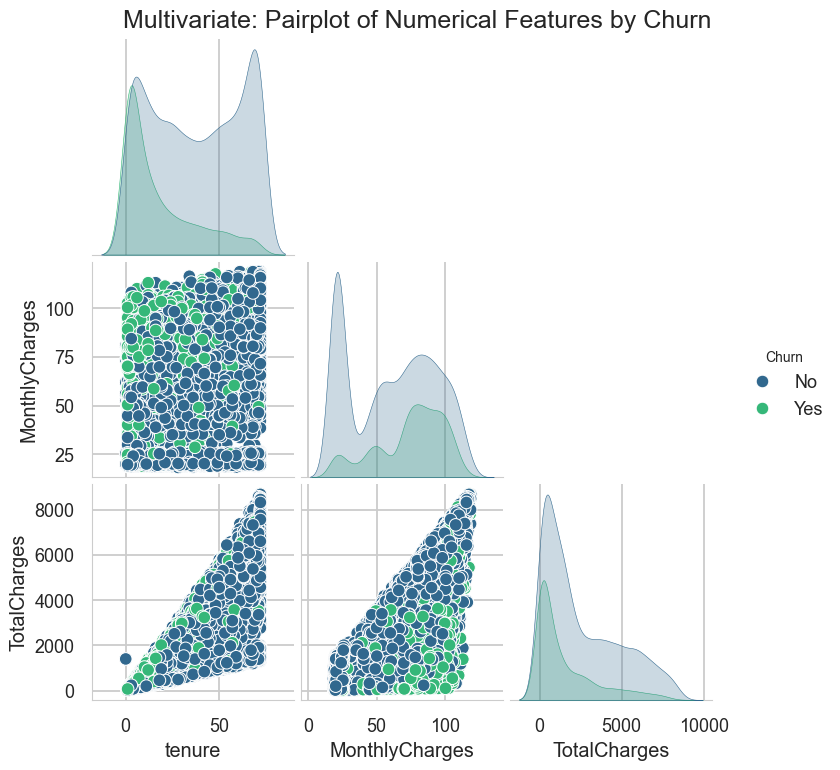



EDA and Visualization complete.

--- Final Cleaned DataFrame Head ---


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerFeedback
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,I have been using the DSL internet service fro...
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,I have been a customer with this company for o...
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,I recently signed up for DSL internet service ...
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,I have been a loyal customer with this company...
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,I recently switched to this fiber optic intern...


In [18]:

print("Generating Plot 7: Pairplot of Key Numerical Features by Churn...")
# Create a temporary dataframe for correlation calculation
pair_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy()
sns.pairplot(pair_df, hue='Churn', palette='viridis', corner=True)
plt.suptitle('Multivariate: Pairplot of Numerical Features by Churn', y=1.02, fontsize=18)
plt.show()

print("\n\nEDA and Visualization complete.")
print("\n--- Final Cleaned DataFrame Head ---")
df.head()


In [16]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from transformers import pipeline as hf_pipeline
import warnings

# --- Setup ---
warnings.filterwarnings('ignore')
print("--- Setup: Loading libraries ---")

# Download necessary NLTK data (only needs to be done once per environment)
try:
    stopwords.words('english')
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords')
try:
    nltk.data.find('wordnet')
except LookupError:
    print("Downloading NLTK WordNet...")
    nltk.download('wordnet')
print("NLTK resources are ready. ✓")

--- Setup: Loading libraries ---
NLTK resources are ready. ✓


[nltk_data] Downloading package wordnet to C:\Users\P RAJ
[nltk_data]     KIRAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# --- 2. Sentiment Analysis Feature Engineering ---
print("\n--- 2. Sentiment Analysis Feature Engineering ---")
print("Initializing sentiment analysis pipeline with DistilBERT...")
sentiment_pipeline = hf_pipeline(
    "sentiment-analysis", 
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

feedback_list = df['CustomerFeedback'].tolist()
truncated_feedback = [text[:512] for text in feedback_list] 

print(f"Analyzing sentiment for {len(truncated_feedback)} feedback entries...")
sentiments = sentiment_pipeline(truncated_feedback)
print("Sentiment analysis complete.")

df['SentimentLabel'] = [s['label'] for s in sentiments]
df['SentimentScore'] = [s['score'] if s['label'] == 'POSITIVE' else -s['score'] for s in sentiments]
print("Created 'SentimentLabel' and 'SentimentScore' features.")


# --- 3. Final Data Preparation for Modeling ---
print("\n--- 3. Preparing Data for Preprocessing Pipeline ---")

X = df.drop(['Churn', 'CustomerFeedback', 'SentimentLabel'], axis=1)
y = df['Churn']

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# --- FIX: Fill any potential missing values in categorical columns ---
print("Filling missing values in categorical features with the mode...")
for col in categorical_features:
    if X[col].isnull().any():
        mode_val = X[col].mode()[0]
        X[col].fillna(mode_val, inplace=True)
        print(f"Filled NaNs in '{col}' with '{mode_val}'")

print(f"\nIdentified {len(numerical_features)} numerical features: {numerical_features}")
print(f"Identified {len(categorical_features)} categorical features: {categorical_features}")


# --- 4. Create and Apply the Preprocessing Pipeline ---
print("\n--- 4. Building the Preprocessing Pipeline ---")

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

print("Applying the preprocessing pipeline to the dataset...")
X_processed = preprocessor.fit_transform(X)
print("Data has been successfully processed.")
print(f"Shape of processed data: {X_processed.shape}")


# --- 5. Save the Processed Data and the Pipeline ---
print("\n--- 5. Saving Artifacts for Model Training ---")

joblib.dump(X_processed, 'X_processed.pkl')
joblib.dump(y, 'y_target.pkl')
print("- Saved processed features to 'X_processed.pkl'")
print("- Saved target variable to 'y_target.pkl'")

joblib.dump(preprocessor, 'preprocessor.pkl')
print("- Saved the fitted preprocessor pipeline to 'preprocessor.pkl'")

print("\nFeature engineering and preprocessing complete. Ready for model training.")



--- 2. Sentiment Analysis Feature Engineering ---
Initializing sentiment analysis pipeline with DistilBERT...
Analyzing sentiment for 7043 feedback entries...
Sentiment analysis complete.
Created 'SentimentLabel' and 'SentimentScore' features.

--- 3. Preparing Data for Preprocessing Pipeline ---
Filling missing values in categorical features with the mode...

Identified 4 numerical features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'SentimentScore']
Identified 16 categorical features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

--- 4. Building the Preprocessing Pipeline ---
Applying the preprocessing pipeline to the dataset...
Data has been successfully processed.
Shape of processed data: (7043, 47)

--- 5. Saving Artifacts for Model Training ---
- Saved processed featu

In [18]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from transformers import pipeline as hf_pipeline
import warnings

# --- Setup ---
warnings.filterwarnings('ignore')
print("--- Setup: Loading libraries ---")

# Download necessary NLTK data (only needs to be done once per environment)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('wordnet')
except LookupError:
    nltk.download('wordnet')
print("NLTK resources are ready. ✓")


# --- 1. Load Cleaned Data ---
print("\n--- 1. Loading and Re-cleaning Data ---")
try:
    df = pd.read_csv('telco_churn_with_all_feedback.csv')
    df.drop(['customerID', 'PromptInput'], axis=1, inplace=True)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
    df['CustomerFeedback'].fillna('', inplace=True)
    df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
    print("Cleaned data loaded successfully.")
except FileNotFoundError:
    print("Error: 'telco_churn_with_all_feedback.csv' not found.")
    exit()

# --- 2. Sentiment Analysis Feature Engineering ---
print("\n--- 2. Sentiment Analysis Feature Engineering ---")
print("Initializing sentiment analysis pipeline with DistilBERT...")
sentiment_pipeline = hf_pipeline(
    "sentiment-analysis", 
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

feedback_list = df['CustomerFeedback'].tolist()
truncated_feedback = [text[:512] for text in feedback_list] 

print(f"Analyzing sentiment for {len(truncated_feedback)} feedback entries...")
sentiments = sentiment_pipeline(truncated_feedback)
print("Sentiment analysis complete.")

df['SentimentLabel'] = [s['label'] for s in sentiments]
df['SentimentScore'] = [s['score'] if s['label'] == 'POSITIVE' else -s['score'] for s in sentiments]
print("Created 'SentimentLabel' and 'SentimentScore' features.")


# --- 3. Final Data Preparation for Modeling ---
print("\n--- 3. Preparing Data for Preprocessing Pipeline ---")

X = df.drop(['Churn', 'CustomerFeedback', 'SentimentLabel'], axis=1)
y = df['Churn']

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# --- FIX: Fill any potential missing values in categorical columns ---
print("Filling missing values in categorical features with the mode...")
for col in categorical_features:
    if X[col].isnull().any():
        mode_val = X[col].mode()[0]
        X[col].fillna(mode_val, inplace=True)
        print(f"Filled NaNs in '{col}' with '{mode_val}'")

print(f"\nIdentified {len(numerical_features)} numerical features: {numerical_features}")
print(f"Identified {len(categorical_features)} categorical features: {categorical_features}")


# --- 4. Create and Apply the Preprocessing Pipeline ---
print("\n--- 4. Building the Preprocessing Pipeline ---")

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

print("Applying the preprocessing pipeline to the dataset...")
X_processed = preprocessor.fit_transform(X)
print("Data has been successfully processed.")
print(f"Shape of processed data: {X_processed.shape}")


# --- 5. Save the Processed Data and the Pipeline ---
print("\n--- 5. Saving Artifacts for Model Training ---")

joblib.dump(X_processed, 'X_processed.pkl')
joblib.dump(y, 'y_target.pkl')
print("- Saved processed features to 'X_processed.pkl'")
print("- Saved target variable to 'y_target.pkl'")

joblib.dump(preprocessor, 'preprocessor.pkl')
print("- Saved the fitted preprocessor pipeline to 'preprocessor.pkl'")

print("\nFeature engineering and preprocessing complete. Ready for model training.")


--- Setup: Loading libraries ---
NLTK resources are ready. ✓

--- 1. Loading and Re-cleaning Data ---


[nltk_data] Downloading package wordnet to C:\Users\P RAJ
[nltk_data]     KIRAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaned data loaded successfully.

--- 2. Sentiment Analysis Feature Engineering ---
Initializing sentiment analysis pipeline with DistilBERT...
Analyzing sentiment for 7043 feedback entries...
Sentiment analysis complete.
Created 'SentimentLabel' and 'SentimentScore' features.

--- 3. Preparing Data for Preprocessing Pipeline ---
Filling missing values in categorical features with the mode...

Identified 5 numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'SentimentScore']
Identified 15 categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

--- 4. Building the Preprocessing Pipeline ---
Applying the preprocessing pipeline to the dataset...
Data has been successfully processed.
Shape of processed data: (7043, 46)

--- 5. Saving Artifacts for Model Tr